In [1]:
import seaborn as sbn
import numpy as np
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
T = np.linspace(0,1,101)
ql = 1
qh = 2
fb = 0.0
fs = 0.0
wb = 0.0
ws = 0.0

In [3]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.3
T1 = (p-pl)/(qh-ql)
T2 = (p+fb-wb)/qh
T3 = (p+fb-wb)/ql
T4 = (ph-p)/(qh-ql)
data = pd.DataFrame({"T":T, "p":p, "T1":T1, "T2":T2, "T3":T3, "T4":T4})
data["pl"] = pl
data["ph"] = ph

## Segmentation

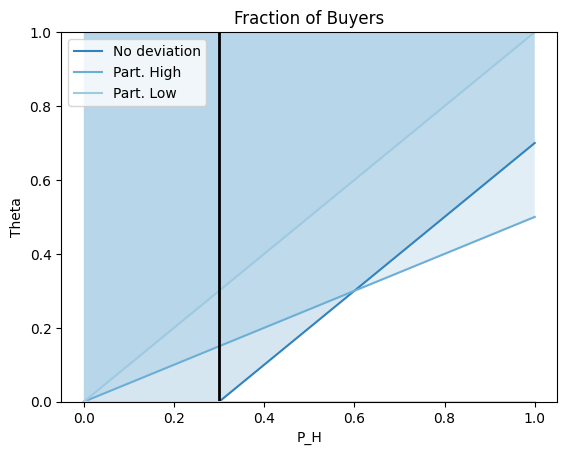

In [4]:
sbn.set_palette("tab20c")
fig1 = sbn.lineplot(data, x = p, y = T1, label = 'No deviation').fill_between(p, T1, y2 = 1, alpha = 0.2)
sbn.lineplot(data, x = p, y = T2, label = 'Part. High').fill_between(p, T2, y2 = 1, alpha = 0.2)
sbn.lineplot(data, x = p, y = T3, label = 'Part. Low').fill_between(p, T3, y2 = 1, alpha = 0.2)
sbn.lineplot(x = pl, y = T, estimator=None, linewidth = 2, color = 'black').set(title = 'Fraction of Buyers', xlabel = 'P_H', ylabel = 'Theta')
sbn.lineplot(x = [0,1], y = [0,0]).set_ylim([0,1])
plt.show()

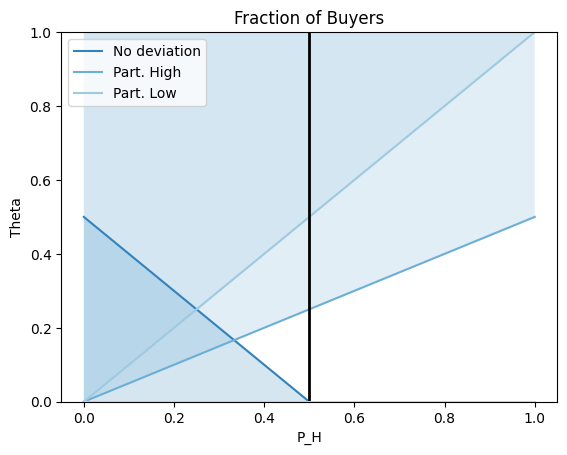

In [5]:
fig2 = sbn.lineplot(data, x = p, y = T4, label = 'No deviation').fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(data, x = p, y = T2, label = 'Part. High').fill_between(p, T2, y2 = 1, alpha = 0.2)
sbn.lineplot(data, x = p, y = T3, label = 'Part. Low').fill_between(p, T3, y2 = 1, alpha = 0.2)
sbn.lineplot(x = ph, y = T, estimator=None, linewidth = 2, color = 'black').set(title = 'Fraction of Buyers', xlabel = 'P_H', ylabel = 'Theta')
sbn.lineplot(x = [0,1], y = [0,0]).set_ylim([0,1])
plt.show()

## Agglomeration

In [6]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.2
T1 = pl/ql*np.ones(101)
T2 = (p-pl)/(qh-ql)
T3 = [max([0,pi/qh, (pi-pl)/(qh-ql)]) for pi in p]
T4 = [min(pi/qh, pl/ql) for pi in p]

In [7]:
(pl/ql)*qh

0.4

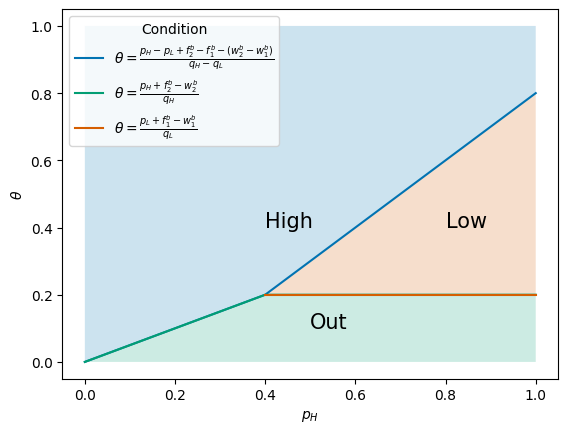

In [8]:
sbn.set_palette("colorblind6")
fig1 = sbn.lineplot(x = p, y = T3, label = r"$\theta = \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}$").fill_between(p, T3, y2 = 1,  alpha = 0.2)
sbn.lineplot(x = p, y = T4, label = r"$\theta = \frac{p_H+f_2^b-w_2^b}{q_H}$").fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(x = p[40:], y = T1[40:], label = r"$\theta = \frac{p_L+f_1^b-w_1^b}{q_L}$").fill_between(p[40:], T1[40:], y2 = T2[40:], alpha = 0.2)
plt.legend(loc='upper left', title='Condition')
sbn.lineplot().set(xlabel = r'$p_H$', ylabel = r'$\theta$')
sbn.lineplot().text(0.40, 0.4, "High", fontsize = 15)
sbn.lineplot().text(0.5, 0.1, "Out", fontsize = 15)
sbn.lineplot().text(0.8, 0.4, "Low", fontsize = 15)
plt.savefig("segmentation_buyers_ph.png")
plt.show()

In [9]:
p = np.linspace(0,1,101)
ph = 0.5
pl = 0.2
T1 = p/ql*np.ones(101)
T2 = (ph-p)/(qh-ql)
T3 = [max([0,ph/qh, (ph-pi)/(qh-ql)]) for pi in p]
T4 = [min(ph/qh, pi/ql) for pi in p]

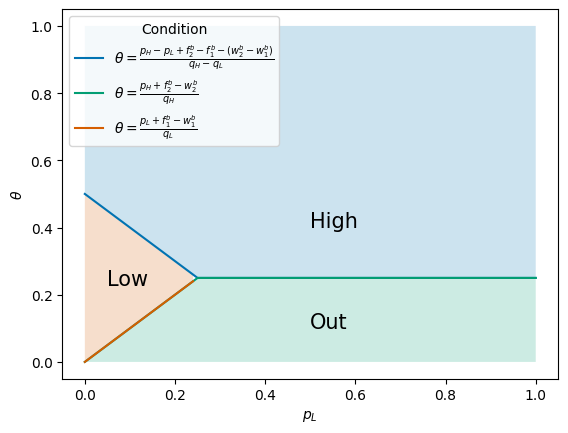

In [10]:
sbn.set_palette("colorblind6")
fig1 = sbn.lineplot(x = p, y = T3, label = r"$\theta = \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}$").fill_between(p, T3, y2 = 1,  alpha = 0.2)
sbn.lineplot(x = p, y = T4, label = r"$\theta = \frac{p_H+f_2^b-w_2^b}{q_H}$").fill_between(p, T4, y2 = 0, alpha = 0.2)
sbn.lineplot(x = p[:25], y = T1[:25], label = r"$\theta = \frac{p_L+f_1^b-w_1^b}{q_L}$").fill_between(p[:25], T1[:25], y2 = T2[:25], alpha = 0.2)
plt.legend(loc='upper left', title='Condition')
sbn.lineplot().set(xlabel = r'$p_L$', ylabel = r'$\theta$')
sbn.lineplot().text(0.5, 0.4, "High", fontsize = 15)
sbn.lineplot().text(0.5, 0.1, "Out", fontsize = 15)
sbn.lineplot().text(0.05, 0.23, "Low", fontsize = 15)
plt.savefig("segmentation_buyers_pl.png")
plt.show()

## Seller Profit

\begin{align}
    \overline{\theta} = \max\left\lbrace \frac{p_H+f_2^b-w_2^b}{q_H}, \frac{p_H-p_L+f_2^b-f_1^b-(w_2^b-w_1^b)}{q_H-q_L}\right\rbrace  \\
    \underline{\theta} = \max\left\lbrace 0,\frac{p_L+f_1^b-w_1^b}{q_L}\right\rbrace
\end{align}

## Seller price setting strategies

In [11]:
def overline_theta(pl, ph):
  return max(ph/qh, (ph-pl)/(qh-ql))
def underline_theta(pl, ph):
  return max(0, pl/ql)

In [12]:
def pih(pl,ph, cl,ch):
  return (1-overline_theta(pl,ph))*(ph-ch)
def pil(pl,ph, cl,ch):
  return (overline_theta(pl,ph)-underline_theta(pl,ph))*(pl-cl)

In [13]:
cl = 0.1
ch = 0.3
p = np.linspace(0,1,1001)

In [14]:
br_h = []
ben_h = []
for pk in p:
  Pih = [pih(pk,pr,cl,ch) for pr in p]
  ben_h.append(max(Pih))
  br_h.append(p[Pih.index(max(Pih))])
br_l = []
ben_l = []
for pk in p:
  Pil = [pil(pr,pk,cl,ch) for pr in p]
  ben_l.append(max(Pil))
  br_l.append(p[Pil.index(max(Pil))])

In [15]:
def find_eq(pl,ph):
  pln = 100
  phn = 100
  iter = 0
  while (pl != pln) or (ph != phn):
    pln = pl
    phn = ph
    Pil = [pil(pr,phn,cl,ch) for pr in p]
    pl = p[Pil.index(max(Pil))]
    Pih = [pih(pln,pr,cl,ch) for pr in p]
    ph = p[Pih.index(max(Pih))]
    iter += 1
    if iter >= 100:
      print("Not")
      break
  return pl, ph

In [16]:
pls, phs = find_eq(pl, ph)

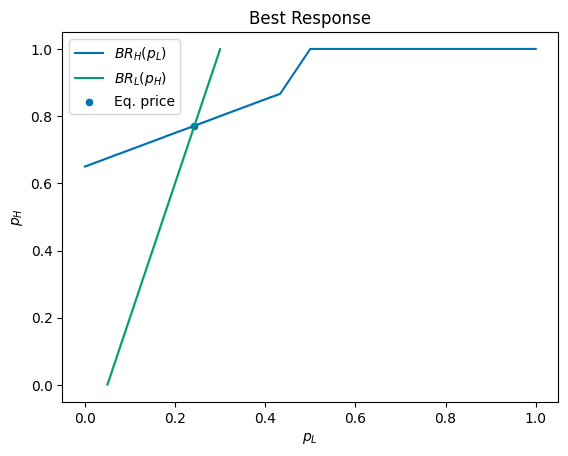

In [17]:
sbn.lineplot(x = p, y = br_h, label = r"$BR_H(p_L)$")
sbn.lineplot(x = br_l, y = p, label = r"$BR_L(p_H)$")
sbn.scatterplot(x = [pls], y = [phs], label = "Eq. price").set(title = 'Best Response', xlabel = r"$p_L$", ylabel = r"$p_H$")
plt.show()

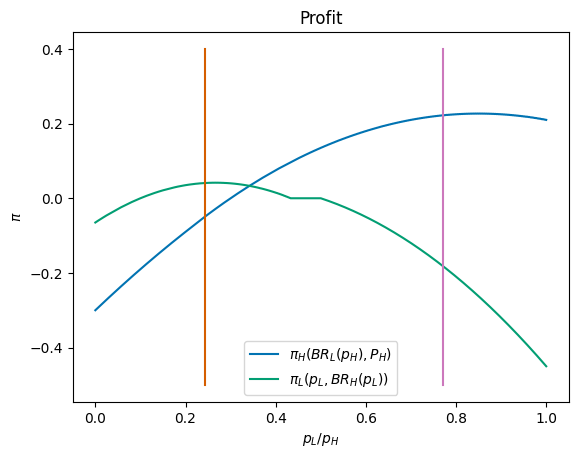

In [18]:
#Rational Sellers
sbn.lineplot(x = p, y = [pih(br_l[i], p[i], cl, ch) for i in range(0, 1001)], label = r"$\pi_H(BR_L(p_H), P_H)$")
sbn.lineplot(x = p, y = [pil(p[i], br_h[i], cl, ch) for i in range(0, 1001)], label = r"$\pi_L(p_L, BR_H(p_L))$").set(title = 'Profit', xlabel = r"$p_L/ p_H$", ylabel = r"$\pi$")
sbn.lineplot(x = [pls, pls], y = [-0.5,0.4], estimator = None)
sbn.lineplot(x = [phs, phs], y = [-0.5,0.4], estimator = None)
plt.show()

In [19]:
#Check if conditions for buyer behaviour hold in this eq.
# Buyers of high quality type
print(overline_theta(pls, phs)*qh - phs  >= 0)
print(overline_theta(pls, phs)*qh - phs >= overline_theta(pls, phs)*ql - pls)

True
True


In [20]:
#Buyers of low quality type
print(underline_theta(pls, phs)*ql - pls  >= 0)
print(underline_theta(pls, phs)*ql - pls >= underline_theta(pls, phs)*qh - phs)

True
True
